# Итерационные методы решения СЛАУ
## Метод минимальных невязок

<span style="font-style:normal; font-size:14pt;">
$$
\begin{cases}
u_{xx} + u_{yy} = f(x,y), \ \ \ \ 0 < x < 2, \ \ \ \  0 < y < 1  \\
\left. u\right|_S = \left.\mu\right|_S        \\ 
\end{cases}
$$

$$
\begin{equation}
u_0 = (3x + y^{2}) \cos(x + 2y) + x^{2}
\end{equation}
$$
    
> Из аналитического решение получим неоднородности:
    
$$
\begin{align}
    &f(x, y) = -2 \sin(x + 2y) [3 + 4y] + \cos(x + 2y) [-5y^{2} - 15x + 2] + 2,   \\
    &u(0, y) = y^{2} \cos{2y}                  \\
    &u(2, y) = (6 + y^{2}) \cos(2 + 2y) + 4    \\
    &u(x, 0) = 3x \cos{x} + x^{2}              \\
    &u(x, 1) = (3x + 1) \cos(x + 2) + x^2      \\
\end{align}
$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix

In [ ]:
# Невязка
def residual(A, X, F):
    return np.linalg.norm(np.dot(A,X) - F)

In [ ]:
# Метод минимальных невязок
def min_residual_method(A, F, eps=1e-10):
  n = len(A.toarray())
  X_cur = np.ones(n)
  r_cur = A.dot(X_cur) - F 

  norm_prev = np.linalg.norm(r_cur)

  k = 0
  while np.linalg.norm(r_cur) > eps * norm_prev:
      k += 1

      Ar_k = A.dot(r_cur)
      Ar_k_trans = Ar_k.reshape((1, Ar_k.shape[0]))
      tau = Ar_k_trans.dot(r_cur) / Ar_k.dot(Ar_k)

      X_cur = X_cur - tau * r_cur
      r_cur = A.dot(X_cur) - F 
      
  return X_cur, k

### Постановка задачи

In [ ]:
# Аналитическое решение
def u(x, y):
    return (3*x + y**2) * np.cos(x + 2 * y) + x**2

# Неоднородность
def f(x, y):
    return (-2) * np.sin(x + 2 * y) * (3 + 4 * y) + np.cos(x + 2 * y) * (-5 * y**2 - 15 * x + 2) + 2

# Граничные условия

# ГУ для оси x (левый и правый конец)
def mu_x(y):
    mu_x1 = y**2 * np.cos(2 * y)
    mu_x2 = (6 + y**2) * np.cos(2 + 2 * y) + 4
    return [mu_x1, mu_x2]

# ГУ для оси y (нижняя и верхняя границы)
def mu_y(x):
    mu_y1 = 3 * x * np.cos(x) + x**2
    mu_y2 = (3 * x + 1) * np.cos(x + 2) + x**2
    return [mu_y1, mu_y2]

In [ ]:
# Область значений и шаг по x
left  = 0
right = 2
hx    = 0.01

# Область значений и шаг по y
bottom = 0
top    = 1
hy     = 0.01

In [ ]:
# координатная сетка
Nx = int((right - left) / hx) - 1
Ny = int((top - bottom) / hy) - 1

x_plot = np.array([left   + (i + 1) * hx for i in range(Nx)])
y_plot = np.array([bottom + (i + 1) * hy for i in range(Ny)])

In [ ]:
len(x_plot) * len(y_plot)

19701

In [ ]:
# Заполнение матриц 

A = np.zeros((Nx * Ny, Nx * Ny))
F = np.zeros(Nx * Ny)

for j in range(Ny):
    for i in range(Nx):
        index = j * Nx + i 

        mu_x1, mu_x2 = mu_x(y_plot[j])
        mu_y1, mu_y2 = mu_y(x_plot[i])

        A[index, index] = 2 * (hx**2 + hy**2)
        F[index]        = (-1) * f(x_plot[i], y_plot[j]) * hx**2 * hy**2
        
        if j == 0:
            A[index][index + Nx] = (-1)  * hx**2 
            F[index]            += mu_y1 * hx**2
        elif j == Ny - 1:
            A[index][index - Nx] = (-1)  * hx**2
            F[index]            += mu_y2 * hx**2
        else:
            A[index][index - Nx] = (-1) * hx**2
            A[index][index + Nx] = (-1) * hx**2

        if i == 0:
            A[index][index + 1] = (-1)  * hy**2
            F[index]           += mu_x1 * hy**2
        elif i == Nx - 1:
            A[index][index - 1] = (-1)  * hy**2
            F[index]           += mu_x2 * hy**2
        else:
            A[index][index - 1] = (-1) * hy**2
            A[index][index + 1] = (-1) * hy**2

A = csr_matrix(A.copy())

### Метод минимальных невязок

In [ ]:
# Аналитическое решение
U0 = np.array([u(i, j) for j in y_plot for i in x_plot])
u0_plot = U0.reshape((Ny, Nx))

In [ ]:
# Численное решение
U, k   = min_residual_method(A, F)
u_plot = U.reshape((Ny, Nx))

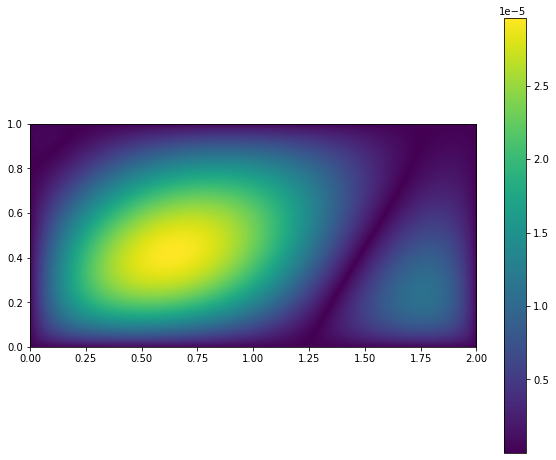

In [ ]:
plt.figure(figsize=(10,8))

plt.imshow(np.abs(u_plot - u0_plot), extent = [left, right, bottom, top])
plt.colorbar();

In [ ]:
error = np.max(np.abs(u_plot - u0_plot))
error

2.961131583102683e-05

In [ ]:
k

56340

In [ ]:
a = 0.00011826039130637123
b = 2.961131583102683e-05

print(a / b)

3.993756710482201
